# Sequential perceptron Learning 

In [107]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# about plotting the decision boundary
# https://stats.stackexchange.com/questions/169343/how-to-plot-the-or-function-along-with-the-decision-boundary-of-a-perceptron
# esta me ayudo!...
# http://stamfordresearch.com/scikit-learn-perceptron/


In [120]:
X = np.array([[1,5],[2,5],[4,1],[5,1]],dtype=float)
W = np.array([-25,6,3],dtype=float)
Y = np.array([1,1,2,2])#np.array([[1],[1],[2],[2]])
alpha = 1
epochs = 1000

In [121]:
# as we are putting together theintercet (Wo) and the Weights of the X features
# we augment and normalize the feture vectors (in this case the feature matrix)
# in order to easily do the dot product to calculate g(x) = W.X

#-------------------
# Augmenting...
#-------------------
intrcpt = np.ones((X.shape[0],1),dtype=float)
X_an = np.append(intrcpt,X,axis=1)

#-------------------
# normalizing
#-------------------
# we are setting Wo as well as the features of class 2 to negative values
X_an[Y == 2] = np.multiply(X_an[Y == 2],[-1])


### Batch Perceptron Learning Algorithm (with augmented notation and sample normalisation)

In [122]:
epoch = 0
go = True
while go:
    print "epoch:",epoch+1
    g_x = X_an.dot(W)
    print "g_x:",g_x
    # we filter the ones that were misclassified i.e g(x) < 0, so we only  add their values to calculate the new W's
    filtered = X_an[g_x < 1]
    if len(filtered) > 0 and epoch < epochs:
        W = np.multiply(X_an[g_x < 1].sum(axis=0),[alpha])  + W
    else:
        go = False
    print "W's:",W
    epoch +=1


epoch: 1
g_x: [-4.  2. -2. -8.]
W's: [-26.  -2.   6.]
epoch: 2
g_x: [  2.   0.  28.  30.]
W's: [-25.   0.  11.]
epoch: 3
g_x: [ 30.  30.  14.  14.]
W's: [-25.   0.  11.]


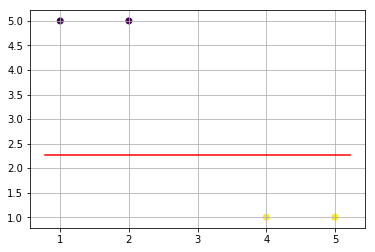

In [123]:
plt.scatter(X[:,0],X[:,1],c=Y)

# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
a = -W[1] / W[2]
yy = np.linspace(ymin, ymax)
xx = a * xx - (W[0]) / W[2]
 
# Plot the line
plt.plot(yy,xx, 'r-')
plt.grid()
plt.show()

In [113]:
#np.array([1,2,2],dtype=float).dot(W)

-3.0

### Sequential Perceptron Learning Algorithm (with augmented notation and sample normalisation)

In [160]:
epoch = 0
epochs =1000
go = True
W = np.array([-25,6,3],dtype=float)
weights_updated = False
#W_old = np.zeros((len(W),))

while go:
    if epoch < epochs:
        print "epoch:",epoch+1
        for row in X_an:
            g_x = row.dot(W)
            #print "row:",row
            print "g_x:",g_x
            if g_x < 0:
                W = np.multiply(row,[alpha]) + W
                weights_updated = True
        
        
        go = False if not weights_updated else True
        # reset the variable weights_updated
        weights_updated = False
        # increase epoch counter
        epoch += 1
    else:
        go = False

print "W's:",W

epoch: 1
g_x: -4.0
g_x: 30.0
g_x: -12.0
g_x: 3.0
epoch: 2
g_x: 13.0
g_x: 16.0
g_x: 6.0
g_x: 3.0
W's: [-25.   3.   7.]


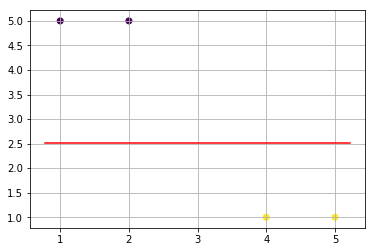

In [159]:
plt.scatter(X[:,0],X[:,1],c=Y)

# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
a = -W[1] / W[2]
yy = np.linspace(ymin, ymax)
xx = a * xx - (W[0]) / W[2]
# Plot the line
plt.plot(yy,xx, 'r-')
plt.grid()
plt.show()

In [166]:
X = np.array([[0,2],[1,2],[2,1],[-3,1],[-2,-1],[-3,-2]],dtype=float)
W = np.array([1,0,0],dtype=float)
Y = np.array([1,1,1,-1,-1,-1])#np.array([[1],[1],[2],[2]])
alpha = 1
epochs = 12
epoch = 0
go = True
weights_updated = False
#W_old = np.zeros((len(W),))
###
#-------------------
# Augmenting...
#-------------------
intrcpt = np.ones((X.shape[0],1),dtype=float)
X_an = np.append(intrcpt,X,axis=1)
###


while go:
    if epoch < epochs:
        print "epoch:",epoch+1
        for i in range(len(X_an)):
            g_x = X_an[i].dot(W)
            print "row:",X_an[i]
            print "W:",W
            print "g_x:",g_x
            print "target:",Y[i]
            if g_x != Y[i]:
                W = np.multiply(X_an[i],[alpha]) + W
                weights_updated = True
        
        
        go = False if not weights_updated else True
        # reset the variable weights_updated
        weights_updated = False
        # increase epoch counter
        epoch += 1
    else:
        go = False

print "W's:",W

epoch: 1
row: [ 1.  0.  2.]
W: [ 1.  0.  0.]
g_x: 1.0
target: 1
row: [ 1.  1.  2.]
W: [ 1.  0.  0.]
g_x: 1.0
target: 1
row: [ 1.  2.  1.]
W: [ 1.  0.  0.]
g_x: 1.0
target: 1
row: [ 1. -3.  1.]
W: [ 1.  0.  0.]
g_x: 1.0
target: -1
row: [ 1. -2. -1.]
W: [ 2. -3.  1.]
g_x: 7.0
target: -1
row: [ 1. -3. -2.]
W: [ 3. -5.  0.]
g_x: 18.0
target: -1
epoch: 2
row: [ 1.  0.  2.]
W: [ 4. -8. -2.]
g_x: 0.0
target: 1
row: [ 1.  1.  2.]
W: [ 5. -8.  0.]
g_x: -3.0
target: 1
row: [ 1.  2.  1.]
W: [ 6. -7.  2.]
g_x: -6.0
target: 1
row: [ 1. -3.  1.]
W: [ 7. -5.  3.]
g_x: 25.0
target: -1
row: [ 1. -2. -1.]
W: [ 8. -8.  4.]
g_x: 20.0
target: -1
row: [ 1. -3. -2.]
W: [  9. -10.   3.]
g_x: 33.0
target: -1
epoch: 3
row: [ 1.  0.  2.]
W: [ 10. -13.   1.]
g_x: 12.0
target: 1
row: [ 1.  1.  2.]
W: [ 11. -13.   3.]
g_x: 4.0
target: 1
row: [ 1.  2.  1.]
W: [ 12. -12.   5.]
g_x: -7.0
target: 1
row: [ 1. -3.  1.]
W: [ 13. -10.   6.]
g_x: 49.0
target: -1
row: [ 1. -2. -1.]
W: [ 14. -13.   7.]
g_x: 33.0
target: -1
ro